In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

(-130.0, -65.0, 24.0, 50.0)

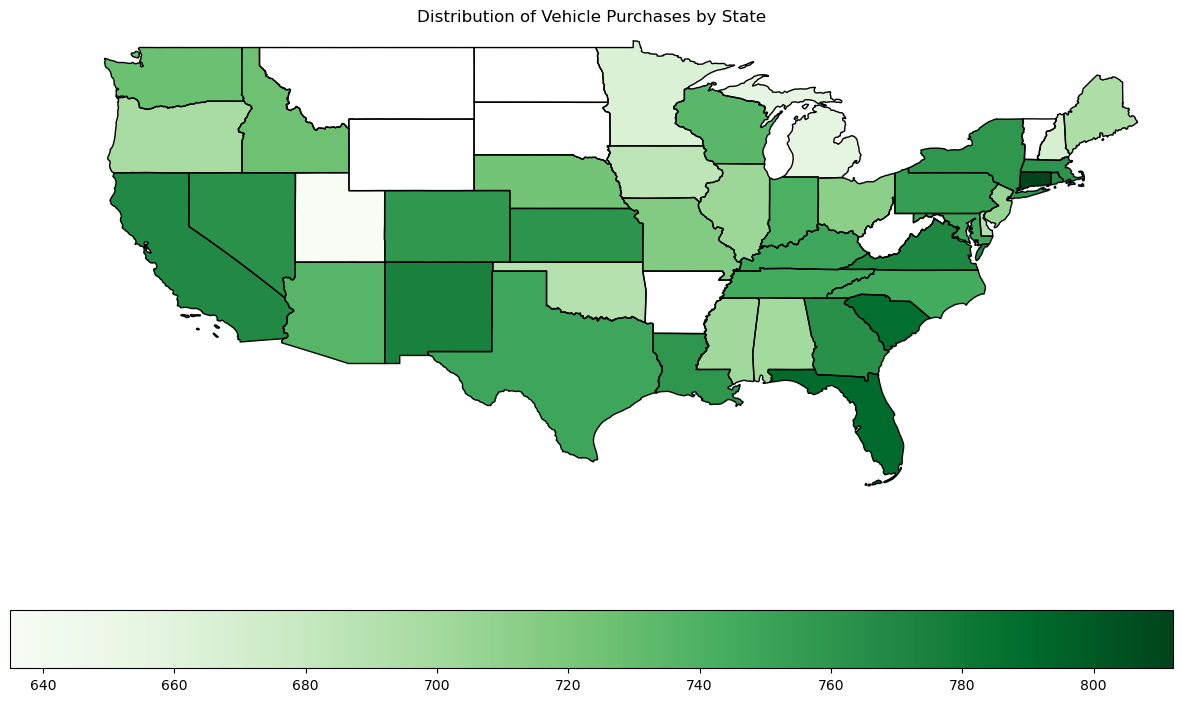

In [106]:
carmax=pd.read_csv("/Users/navyabingi/Downloads/Fall 2024 Dataset.csv")

import geopandas as gpd

states=gpd.read_file("/Users/navyabingi/Downloads/cb_2018_us_state_20m/cb_2018_us_state_20m.shp")


purchase_counts = carmax.groupby(['state', 'purchase_flag']).size().unstack(fill_value=0)
purchase_counts = purchase_counts.reset_index()
merged_purchase = states.merge(purchase_counts, left_on='STUSPS', right_on='state', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for better contrast
merged_purchase.plot(column=True, ax=ax, legend=True, cmap='Greens',legend_kwds={'orientation': 'horizontal'})  # Replace with your relevant column
ax.set_aspect('equal')

# Adjust axis limits to focus on the U.S.
ax.set_xlim(-130, -65)  # Longitude limits (adjust if needed)
ax.set_ylim(24, 50) 
# Title and labels
plt.title('Distribution of Vehicle Purchases by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired


In [107]:
carmax.describe()

,Unnamed: 0,campaign_a_touchpoints,campaign_b_touchpoints,campaign_c_touchpoints,total_touchpoints,num_web_visits,finance_customer,service_plan_customer,unaided_awareness
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,0.185650,1.644060,0.179440,2.009150,25.875940,0.223570,0.182670,0.182791
std,28867.657797,1.642355,4.329376,0.831365,4.710237,24.373602,0.416639,0.386398,0.072074
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.049422
25%,24999.750000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.128091
50%,49999.500000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.168585
75%,74999.250000,0.000000,1.000000,0.000000,2.000000,37.000000,0.000000,0.000000,0.223633
max,99999.000000,95.000000,98.000000,21.000000,98.000000,183.000000,1.000000,1.000000,0.457150


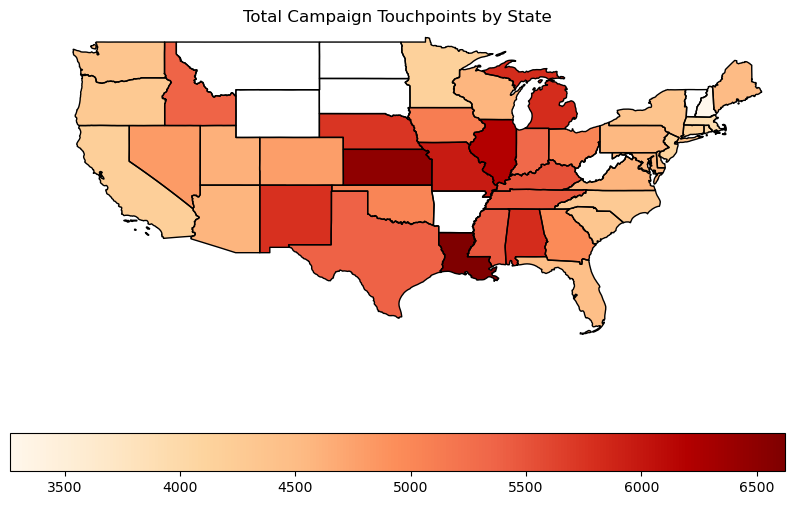

In [108]:
state_touchpoints = carmax.groupby('state')['total_touchpoints'].sum().reset_index()
merged_touchpoints = states.merge(state_touchpoints, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints.plot(column='total_touchpoints', ax=ax, legend=True, cmap='OrRd',legend_kwds={'orientation': 'horizontal'})

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Total Campaign Touchpoints by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

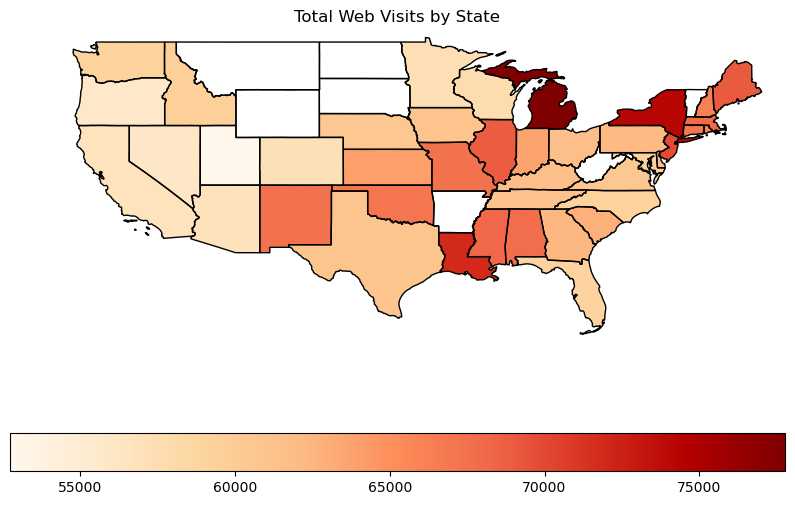

In [109]:
web_touchpoints = carmax.groupby('state')['num_web_visits'].sum().reset_index()
merged_touchpoints = states.merge(web_touchpoints, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints.plot(column='num_web_visits', ax=ax, legend=True, cmap='OrRd',legend_kwds={'orientation': 'horizontal'})

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Total Web Visits by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

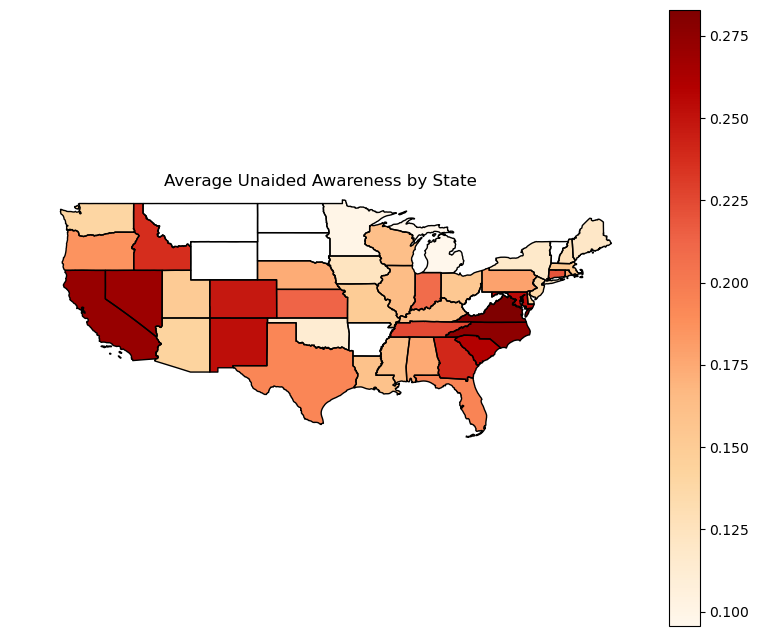

In [110]:
awareness = carmax.groupby('state')['unaided_awareness'].mean().reset_index()
merged_touchpoints = states.merge(awareness, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints.plot(column='unaided_awareness', ax=ax, legend=True, cmap='OrRd')

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Average Unaided Awareness by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

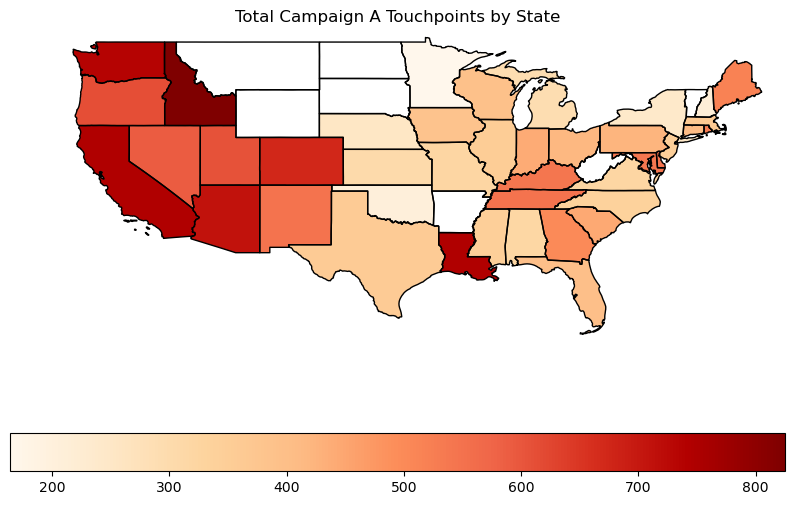

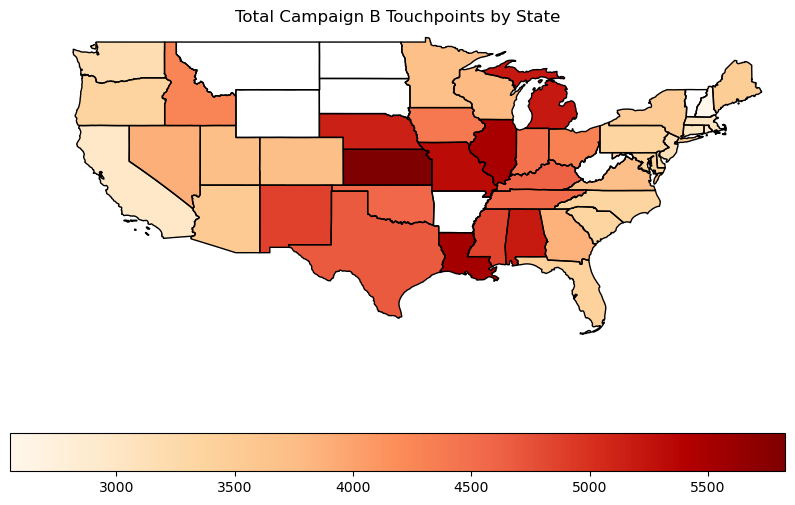

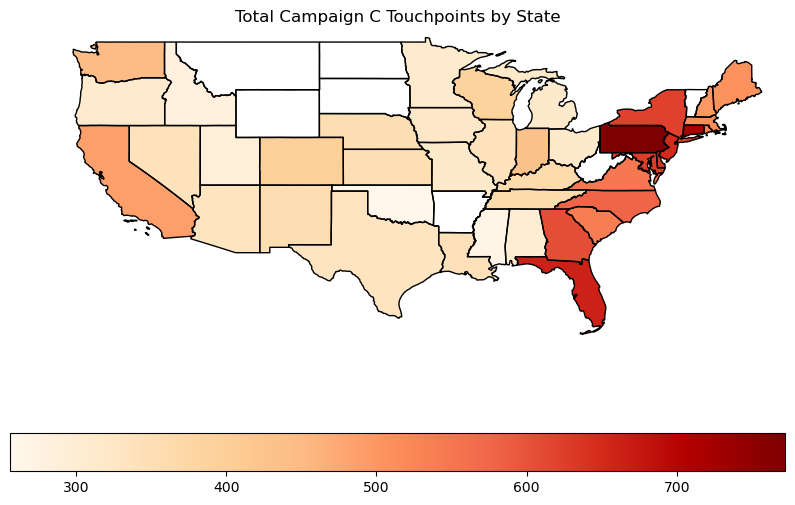

In [111]:
a_touchpoints = carmax.groupby('state')['campaign_a_touchpoints'].sum().reset_index()
merged_touchpoints = states.merge(a_touchpoints, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints.plot(column='campaign_a_touchpoints', ax=ax, legend=True, cmap='OrRd',legend_kwds={'orientation': 'horizontal'})

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Total Campaign A Touchpoints by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

b_touchpoints = carmax.groupby('state')['campaign_b_touchpoints'].sum().reset_index()
merged_touchpoints2 = states.merge(b_touchpoints, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints2.plot(column='campaign_b_touchpoints', ax=ax, legend=True, cmap='OrRd',legend_kwds={'orientation': 'horizontal'})

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Total Campaign B Touchpoints by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

c_touchpoints = carmax.groupby('state')['campaign_c_touchpoints'].sum().reset_index()
merged_touchpoints3 = states.merge(c_touchpoints, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints3.plot(column='campaign_c_touchpoints', ax=ax, legend=True, cmap='OrRd',legend_kwds={'orientation': 'horizontal'})

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Total Campaign C Touchpoints by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

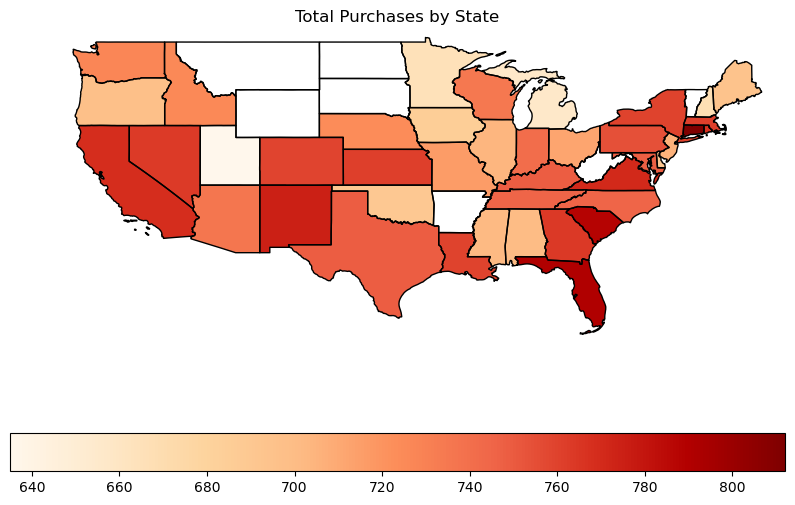

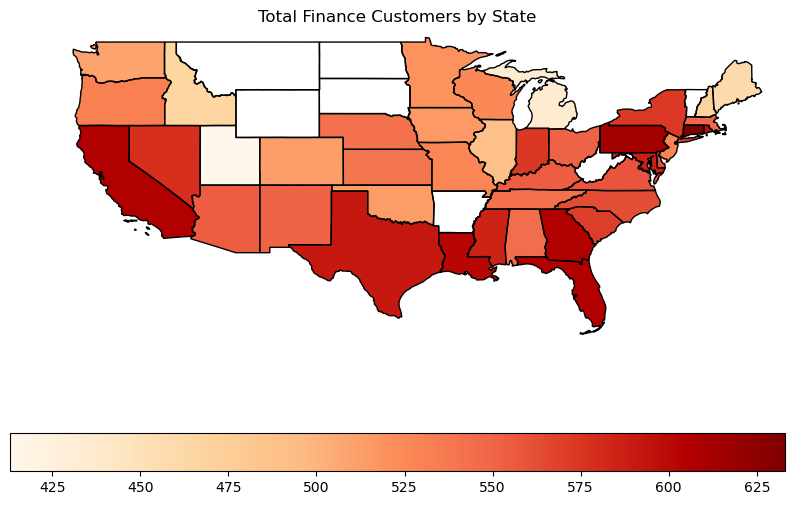

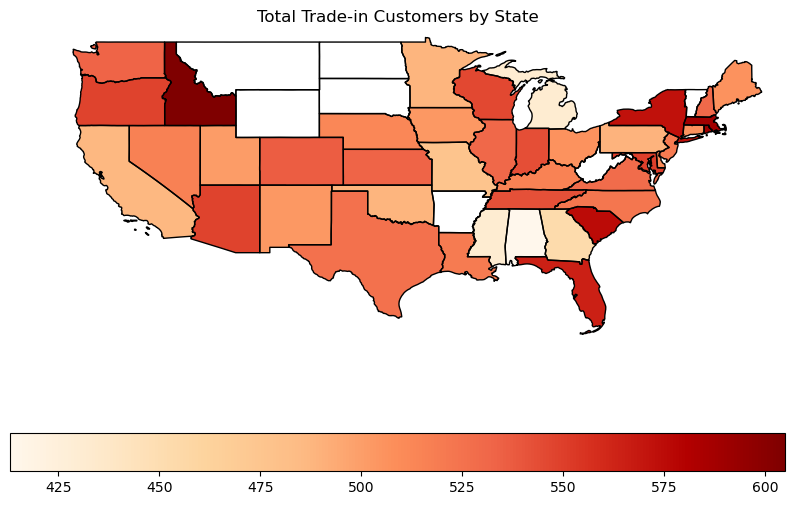

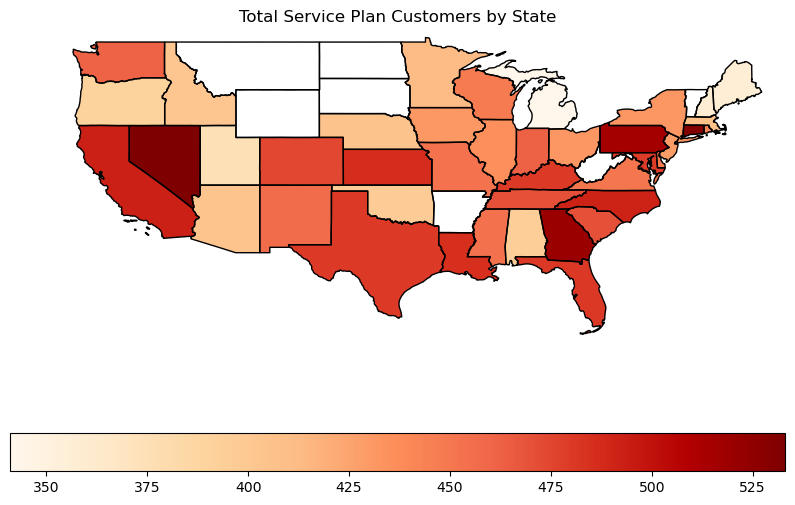

In [112]:
total_purchases = carmax.groupby('state')['purchase_flag'].sum().reset_index()
merged_touchpoints = states.merge(total_purchases, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints.plot(column='purchase_flag', ax=ax, legend=True, cmap='OrRd',legend_kwds={'orientation': 'horizontal'})

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Total Purchases by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

total_finance = carmax.groupby('state')['finance_customer'].sum().reset_index()
merged_touchpoints4 = states.merge(total_finance, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints4.plot(column='finance_customer', ax=ax, legend=True, cmap='OrRd',legend_kwds={'orientation': 'horizontal'})

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Total Finance Customers by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

total_trade = carmax.groupby('state')['trade_in_customer'].sum().reset_index()
merged_touchpoints5 = states.merge(total_trade, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints5.plot(column='trade_in_customer', ax=ax, legend=True, cmap='OrRd',legend_kwds={'orientation': 'horizontal'})

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Total Trade-in Customers by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

total_service = carmax.groupby('state')['service_plan_customer'].sum().reset_index()
merged_touchpoints6 = states.merge(total_service, left_on='STUSPS', right_on='state', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
states.boundary.plot(ax=ax, linewidth=1, color='black')  # Black boundaries for contrast

# Plot the merged data
merged_touchpoints6.plot(column='service_plan_customer', ax=ax, legend=True, cmap='OrRd',legend_kwds={'orientation': 'horizontal'})

# Set aspect ratio and axis limits
ax.set_aspect('equal')
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)

# Title and labels
plt.title('Total Service Plan Customers by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  # Turn off the axis if desired
plt.show()

In [113]:
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'DC': 'South', 'FL': 'South', 'GA': 'South', 'KY': 'South',
    'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South',
    'VA': 'South', 'WV': 'South',
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West',
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West'
}

carmax['region'] = carmax['state'].map(state_to_region)
regions=carmax['region']
vehicle=carmax['vehicle_class']
carmax=carmax.drop(['state','Unnamed: 0'],axis=1)
carmax=pd.get_dummies(carmax, columns=['region','vehicle_class'],dtype='int')
carmax = carmax[['campaign_a_touchpoints', 'campaign_b_touchpoints',
       'campaign_c_touchpoints', 'total_touchpoints', 'num_web_visits',
       'finance_customer', 'service_plan_customer',
       'trade_in_customer', 'region_Midwest',
       'region_Northeast', 'region_South', 'region_West',
       'vehicle_class_COMPACT', 'vehicle_class_FULL SIZE',
       'vehicle_class_LARGE SUV', 'vehicle_class_LUXURY',
       'vehicle_class_MEDIUM SUV', 'vehicle_class_MID SIZE',
       'vehicle_class_PICKUP', 'vehicle_class_SMALL SUV',
       'vehicle_class_SPORTS CAR', 'vehicle_class_VAN','purchase_flag','unaided_awareness']]
carmax['region']=regions
carmax['vehicle_class']=vehicle
carmax['trade_in_customer'] = carmax['trade_in_customer'].astype(int)
carmax['purchase_flag']=carmax['purchase_flag'].astype(int)

## Overall Summary Statistics

In [114]:
carmax[['campaign_a_touchpoints', 'campaign_b_touchpoints',
       'campaign_c_touchpoints', 'total_touchpoints', 'num_web_visits','unaided_awareness']].describe()

,campaign_a_touchpoints,campaign_b_touchpoints,campaign_c_touchpoints,total_touchpoints,num_web_visits,unaided_awareness
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.185650,1.644060,0.179440,2.009150,25.875940,0.182791
std,1.642355,4.329376,0.831365,4.710237,24.373602,0.072074
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.049422
25%,0.000000,0.000000,0.000000,0.000000,8.000000,0.128091
50%,0.000000,0.000000,0.000000,0.000000,18.000000,0.168585
75%,0.000000,1.000000,0.000000,2.000000,37.000000,0.223633
max,95.000000,98.000000,21.000000,98.000000,183.000000,0.457150


Text(0.5, 1.0, 'Campaign A Touchpoints Distribution')

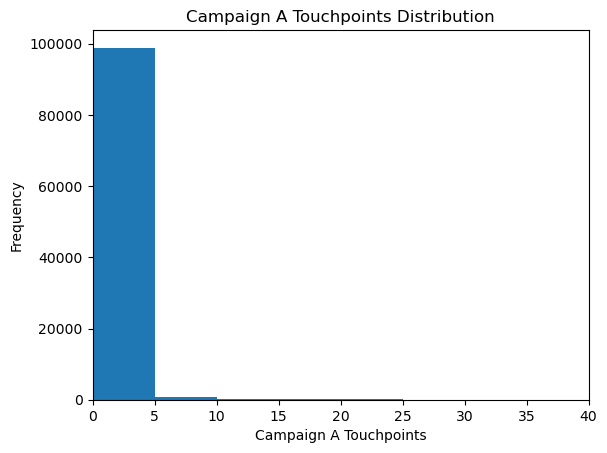

In [115]:
plt.hist(carmax['campaign_a_touchpoints'],bins=np.arange(min(carmax['campaign_a_touchpoints']), max(carmax['campaign_a_touchpoints']) + 5, 5))
plt.xlim([0,40])
plt.xlabel("Campaign A Touchpoints")
plt.ylabel("Frequency")
plt.title("Campaign A Touchpoints Distribution")

Text(0.5, 1.0, 'Campaign B Touchpoints Distribution')

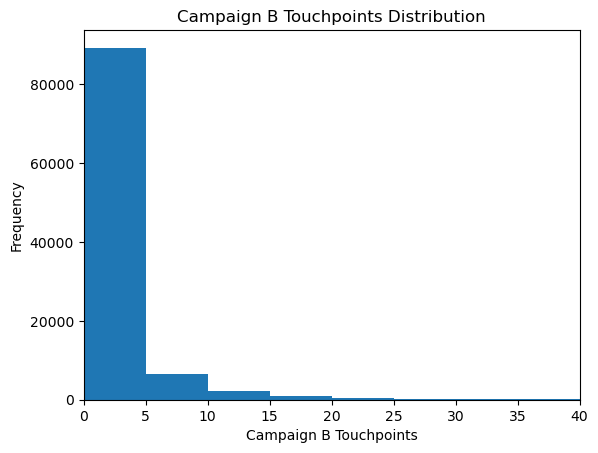

In [116]:
plt.hist(carmax['campaign_b_touchpoints'],bins=np.arange(min(carmax['campaign_b_touchpoints']), max(carmax['campaign_b_touchpoints']) + 5, 5))
plt.xlim([0,40])
plt.xlabel("Campaign B Touchpoints")
plt.ylabel("Frequency")
plt.title("Campaign B Touchpoints Distribution")

Text(0.5, 1.0, 'Campaign C Touchpoints Distribution')

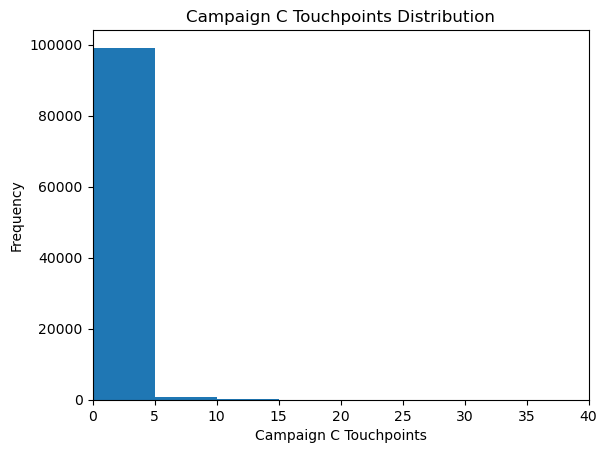

In [117]:
plt.hist(carmax['campaign_c_touchpoints'],bins=np.arange(min(carmax['campaign_c_touchpoints']), max(carmax['campaign_c_touchpoints']) + 5, 5))
plt.xlim([0,40])
plt.xlabel("Campaign C Touchpoints")
plt.ylabel("Frequency")
plt.title("Campaign C Touchpoints Distribution")

Text(0.5, 1.0, 'Total Touchpoints Distribution')

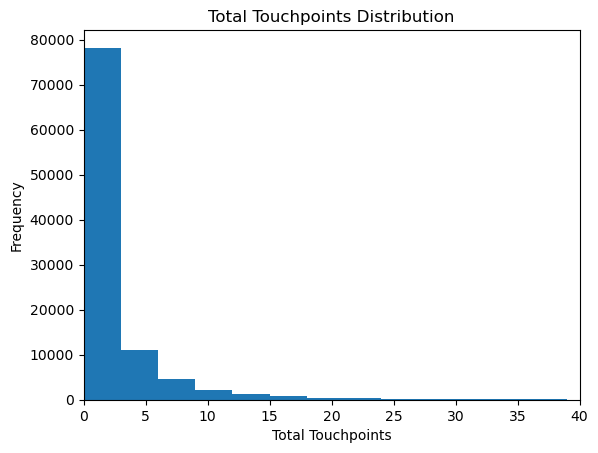

In [118]:
plt.hist(carmax['total_touchpoints'],bins=np.arange(min(carmax['total_touchpoints']), max(carmax['total_touchpoints']) + 3, 3))
plt.xlim([0,40])
plt.xlabel("Total Touchpoints")
plt.ylabel("Frequency")
plt.title("Total Touchpoints Distribution")

Text(0.5, 1.0, 'Number of Web Visits Distribution')

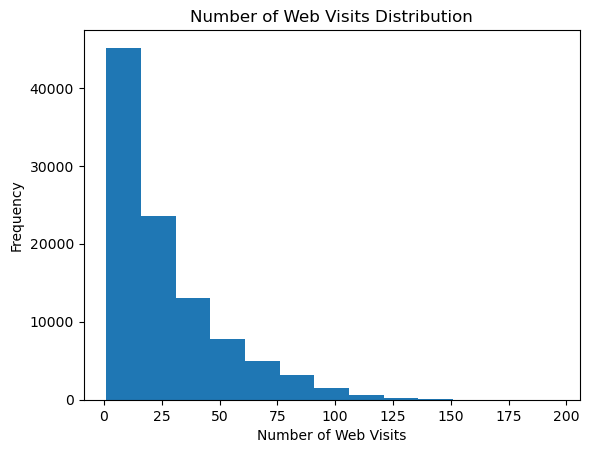

In [119]:
plt.hist(carmax['num_web_visits'],bins=np.arange(min(carmax['num_web_visits']), max(carmax['num_web_visits']) + 15, 15))
#plt.xlim([0,40])
plt.xlabel("Number of Web Visits")
plt.ylabel("Frequency")
plt.title("Number of Web Visits Distribution")

Text(0.5, 1.0, 'Unaided Awareness Distribution')

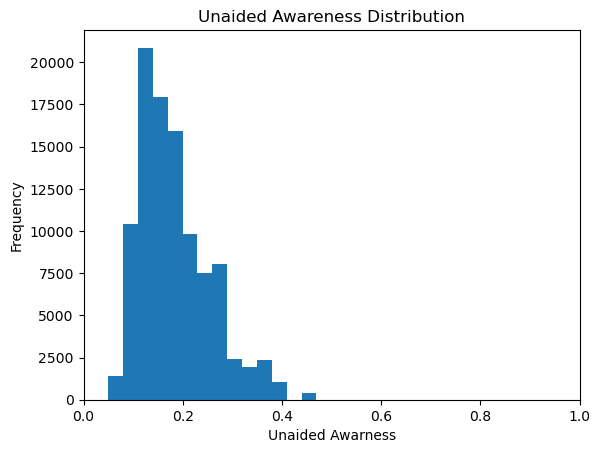

In [120]:
plt.hist(carmax['unaided_awareness'],bins=np.arange(min(carmax['unaided_awareness']), max(carmax['unaided_awareness']) + 0.03, 0.03))
plt.xlim([0,1])
plt.xlabel("Unaided Awarness")
plt.ylabel("Frequency")
plt.title("Unaided Awareness Distribution")

### Which campaign is popular for different regions (AND did that customer buy a vehicle or not)

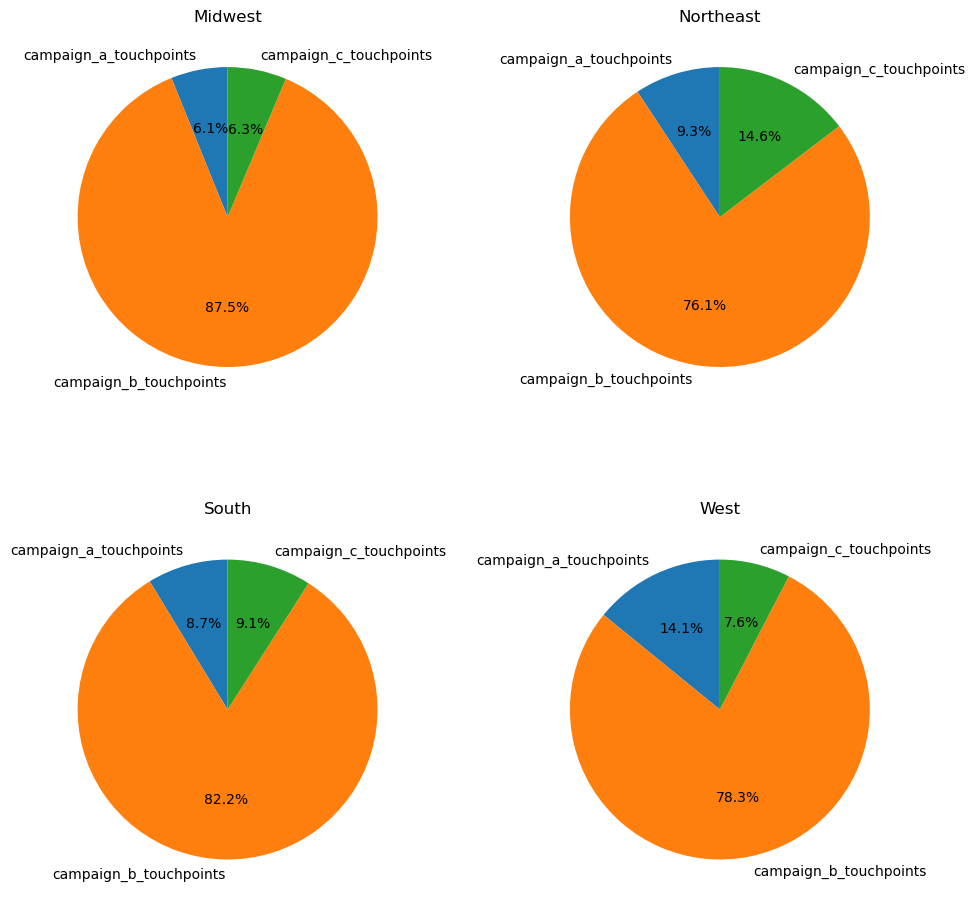

2.071892810718928

In [121]:
grouped = carmax.groupby('region')[['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints']].sum()
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes = axes.flatten()

for idx, region in enumerate(grouped.index):
    region_data = grouped.loc[region]
    axes[idx].pie(region_data, labels=region_data.index, autopct='%1.1f%%', startangle=90)
    axes[idx].set_title(f"{region}")

plt.tight_layout()
plt.show()

# Campaign B seems to be have the most touchpoints for all regions. On average, how many campaign b touchpoints did purchasers have?
purchasers=carmax[carmax['purchase_flag']==1]
purchasers['campaign_b_touchpoints'].mean()

### Which regions tend to have more web visits? Did those who visit the website more end up buying a vehicle?

In [122]:
print(carmax.groupby('region')['num_web_visits'].mean())
carmax.groupby('purchase_flag')['num_web_visits'].mean()

# Northeast had more web visits on average. Those who purchased a vehicle had slightly more web visits on average 

region
Midwest      26.189689
Northeast    27.556763
South        25.840698
West         24.051522
Name: num_web_visits, dtype: float64


purchase_flag
0    24.575782
1    28.909209
Name: num_web_visits, dtype: float64

### Is there a relationship between campaign/web touchpoints and finance customer?

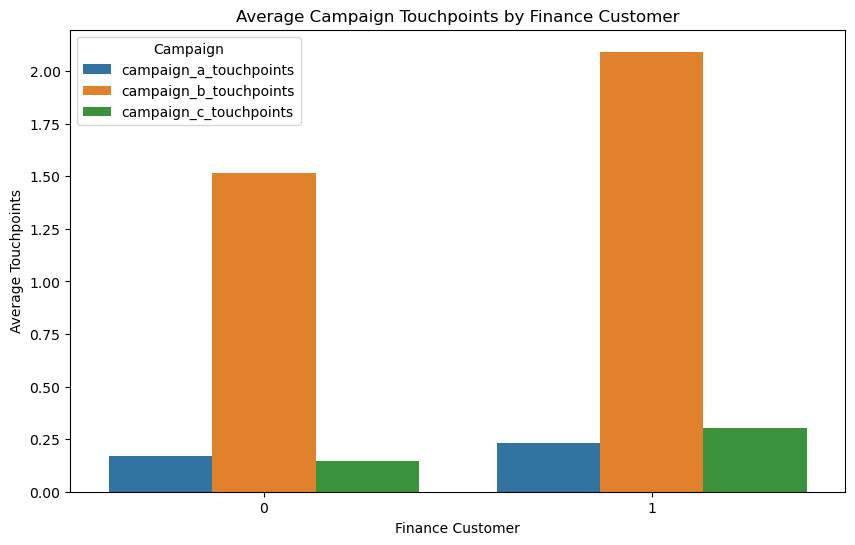

In [123]:
grouped_data = carmax.groupby('finance_customer')[['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints']].mean()

# Reset index to turn 'finance_customer' into a column for easy plotting
grouped_data = grouped_data.reset_index()

# Melt the data to long format for easier plotting with seaborn
grouped_data_melt = pd.melt(grouped_data, id_vars='finance_customer', 
                            value_vars=['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints'],
                            var_name='Campaign', value_name='Mean_Touchpoints')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='finance_customer', y='Mean_Touchpoints', hue='Campaign', data=grouped_data_melt)

# Customize the plot
plt.title('Average Campaign Touchpoints by Finance Customer')
plt.xlabel('Finance Customer')
plt.ylabel('Average Touchpoints')
plt.legend(title='Campaign')
plt.show()

# On average, finance customers had more campaign b touchpoints

In [124]:
carmax.groupby('finance_customer')['num_web_visits'].mean()

# Purchasers had slightly more web touchpoints on average 

finance_customer
0    25.014193
1    28.868676
Name: num_web_visits, dtype: float64

### Are those who visit the website more people who sold a vehicle from carmax (and therefore are more familiar with the website)?

trade_in_customer
0    25.822657
1    26.072952
Name: num_web_visits, dtype: float64


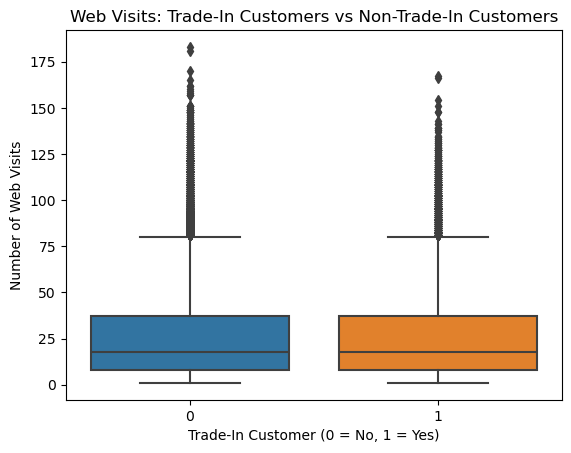

In [125]:
print(carmax.groupby('trade_in_customer')['num_web_visits'].mean())
sns.boxplot(x='trade_in_customer', y='num_web_visits', data=carmax)
plt.title('Web Visits: Trade-In Customers vs Non-Trade-In Customers')
plt.xlabel('Trade-In Customer (0 = No, 1 = Yes)')
plt.ylabel('Number of Web Visits')
plt.show()

# There is no correlation between the average web visits for a trade-in versus not trade-in customer.

### Is there a relationship between the vehicle class and the touchpoints (ex- did those who bought SUVs have more campaign a touchpoints)?

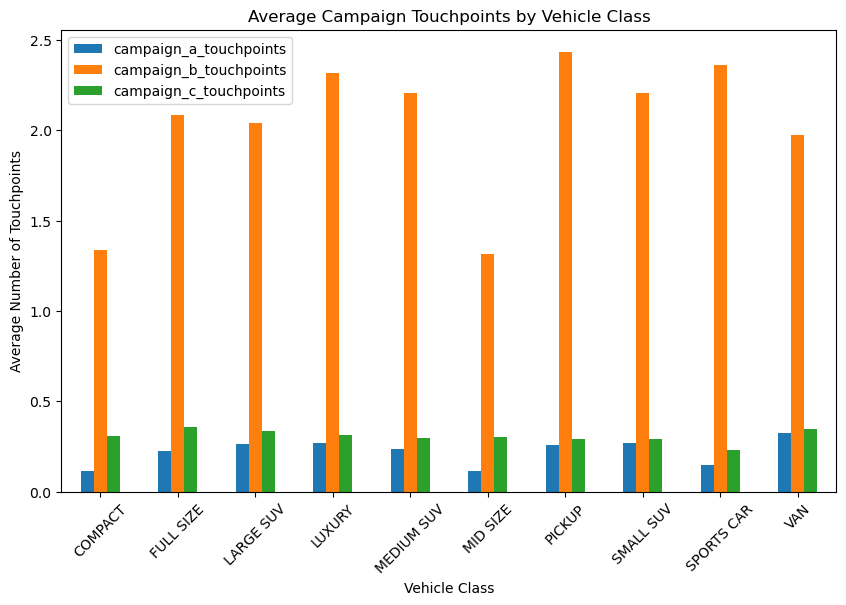

In [126]:
vehicle_touchpoints=purchasers.groupby('vehicle_class')[['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints']].mean()
vehicle_touchpoints.plot(kind='bar', figsize=(10, 6))
plt.title('Average Campaign Touchpoints by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Number of Touchpoints')
plt.xticks(rotation=45)
plt.show()
# On average, van had the most campaign a touchpoints, pickup had the most campaign b touchpoints, and full size had the most campaign c touchpoints. 
# Full size had the most web visits, though the numbers are not that different

### Did trade-in customers buy a vehicle? If so, what campaign appealed most to these customers?

In [127]:
trade_in=carmax[carmax['trade_in_customer']==1]
bought=0
for index,row in trade_in.iterrows():
    if row['purchase_flag']==1:
        bought +=1
bought/len(trade_in)

trade_in_purch=trade_in[trade_in['purchase_flag']==1]
trade_in_purch[['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints']].mean()
# About 40% of trade_in customers bought a vehicle. Campaign b appealed most to trade-in customers who purchased a vehicle. 


campaign_a_touchpoints    0.215466
campaign_b_touchpoints    1.937110
campaign_c_touchpoints    0.256944
dtype: float64

### Do customers who purchase service plans tend to buy certain types of vehicles or respond to certain campaigns?

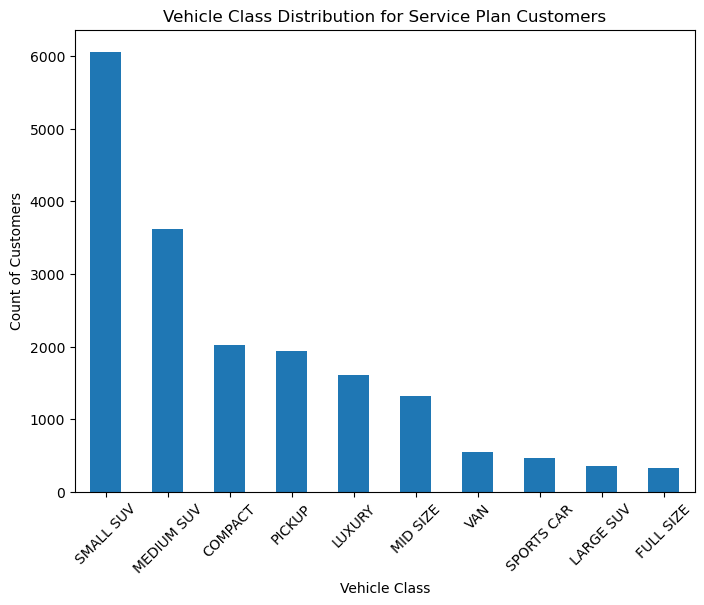

campaign_a_touchpoints    0.244485
campaign_b_touchpoints    2.033175
campaign_c_touchpoints    0.484535
dtype: float64

In [128]:
serv_purch=carmax[(carmax['purchase_flag'] == 1) & (carmax['service_plan_customer'] == 1)]
vehicle_counts=serv_purch['vehicle_class'].value_counts()

vehicle_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Vehicle Class Distribution for Service Plan Customers')
plt.xlabel('Vehicle Class')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()

serv_purch[['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints']].mean()

# Most people who purchase a service plan with the vehicle bought an SUV and respond more to campaign b. 

### Did those who receive touchpoints from all campaigns buy a vehicle?

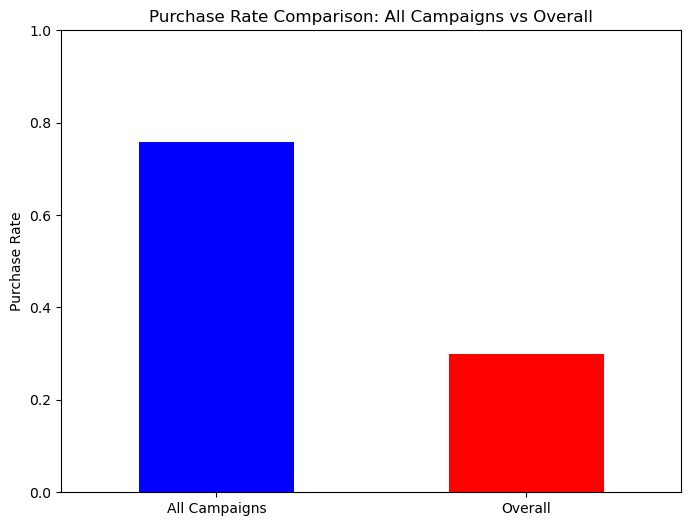

In [129]:
all_campaigns=carmax[(carmax['campaign_a_touchpoints'] > 0) & (carmax['campaign_b_touchpoints'] > 0) & (carmax['campaign_c_touchpoints'] > 0)]
prop=all_campaigns['purchase_flag'].mean()
overall_purchase_rate = carmax['purchase_flag'].mean()

purchase_rates = pd.Series({
    'All Campaigns': prop,
    'Overall': overall_purchase_rate
})

purchase_rates.plot(kind='bar', figsize=(8, 6), color=['blue', 'red'])
plt.title('Purchase Rate Comparison: All Campaigns vs Overall')
plt.ylabel('Purchase Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

# Most customers who had touchpoints in all 3 campaigns ended up buying a vehicle.

### Among those who visit the website, what proportion actually make a purchase?


Text(0.5, 1.0, 'Proportion of Purchases for Customers who Visited Website')

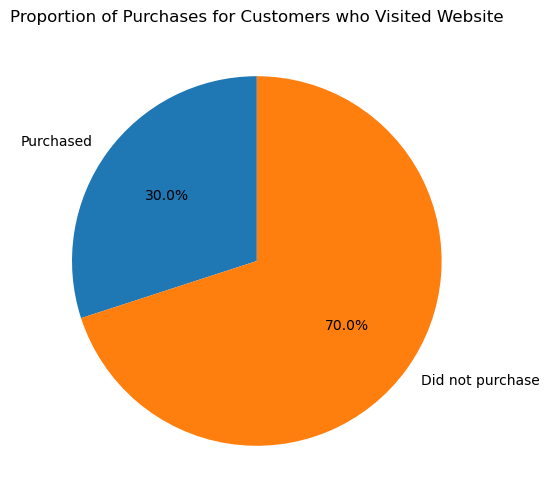

In [130]:
web_greater_1=carmax[carmax['num_web_visits'] > 0]
purchase_mean = web_greater_1['purchase_flag'].mean()

labels = ['Purchased', 'Did not purchase']
plt.figure(figsize=(6, 6))
plt.pie([purchase_mean,1-purchase_mean], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Purchases for Customers who Visited Website')




In [131]:
carmax.columns

Index(['campaign_a_touchpoints', 'campaign_b_touchpoints',
       'campaign_c_touchpoints', 'total_touchpoints', 'num_web_visits',
       'finance_customer', 'service_plan_customer', 'trade_in_customer',
       'region_Midwest', 'region_Northeast', 'region_South', 'region_West',
       'vehicle_class_COMPACT', 'vehicle_class_FULL SIZE',
       'vehicle_class_LARGE SUV', 'vehicle_class_LUXURY',
       'vehicle_class_MEDIUM SUV', 'vehicle_class_MID SIZE',
       'vehicle_class_PICKUP', 'vehicle_class_SMALL SUV',
       'vehicle_class_SPORTS CAR', 'vehicle_class_VAN', 'purchase_flag',
       'unaided_awareness', 'region', 'vehicle_class'],
      dtype='object')

In [132]:
carmax

,campaign_a_touchpoints,campaign_b_touchpoints,campaign_c_touchpoints,total_touchpoints,num_web_visits,finance_customer,service_plan_customer,trade_in_customer,region_Midwest,region_Northeast,...,vehicle_class_MEDIUM SUV,vehicle_class_MID SIZE,vehicle_class_PICKUP,vehicle_class_SMALL SUV,vehicle_class_SPORTS CAR,vehicle_class_VAN,purchase_flag,unaided_awareness,region,vehicle_class
0,10,0,0,10,27,0,0,1,0,0,...,0,0,0,0,0,0,0,0.129019,South,NaN
1,0,1,0,1,92,0,0,0,0,0,...,0,0,0,0,0,0,0,0.333228,South,NaN
2,0,5,0,5,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0.226145,South,NaN
3,0,5,0,5,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0.143720,South,NaN
4,0,0,0,0,13,0,1,0,0,0,...,1,0,0,0,0,0,1,0.457150,South,MEDIUM SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,2,0,2,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0.098715,Midwest,NaN
99996,0,0,0,0,10,0,1,0,1,0,...,0,0,1,0,0,0,1,0.155506,Midwest,PICKUP
99997,0,2,0,2,9,1,1,1,0,1,...,0,0,1,0,0,0,1,0.214259,Northeast,PICKUP
99998,0,0,0,0,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0.123434,Midwest,NaN


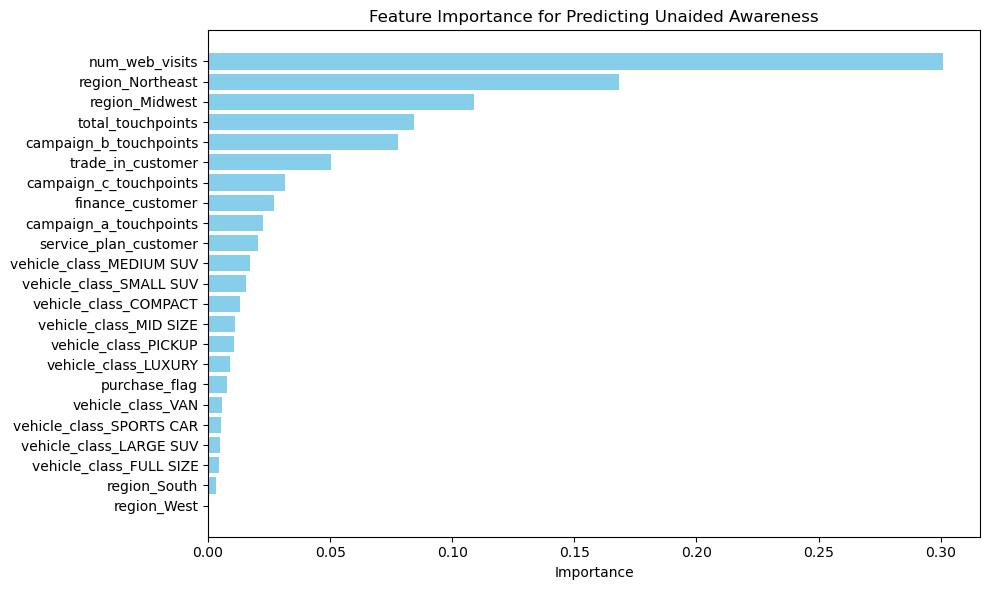

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


##X_train_scaled = scaler.fit_transform(Xr)
#X_test_scaled = scaler.transform(X_test)

X=carmax.drop(['unaided_awareness','region','vehicle_class'],axis=1)
y=carmax['unaided_awareness']

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Get feature importance from the Random Forest model
importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Unaided Awareness')
plt.gca().invert_yaxis()  # Invert y-axis for highest importance at the top
plt.tight_layout()
plt.show()


Accuracy: 0.70


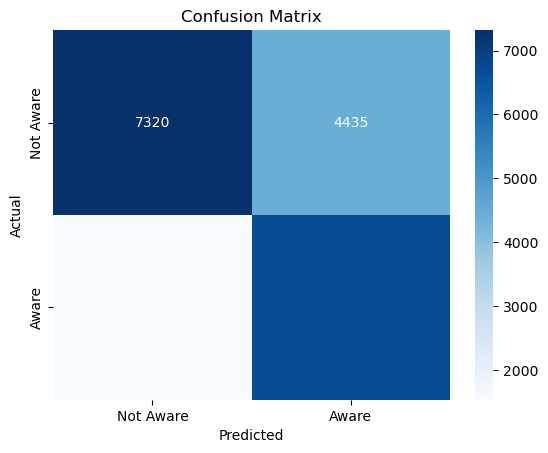

              precision    recall  f1-score   support

           0       0.83      0.62      0.71     11755
           1       0.60      0.81      0.69      8245

    accuracy                           0.70     20000
   macro avg       0.71      0.72      0.70     20000
weighted avg       0.73      0.70      0.70     20000



In [134]:
carmax['unaided_awareness'] = carmax['unaided_awareness'].apply(lambda x: 1 if x > 0.18 else 0)  # Set your threshold
X = carmax[['campaign_b_touchpoints',
       'campaign_c_touchpoints', 'total_touchpoints', 'num_web_visits',
       'finance_customer', 'trade_in_customer',
       'region_Midwest', 'region_Northeast', 'purchase_flag']]
y = carmax['unaided_awareness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Aware', 'Aware'], yticklabels=['Not Aware', 'Aware'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))



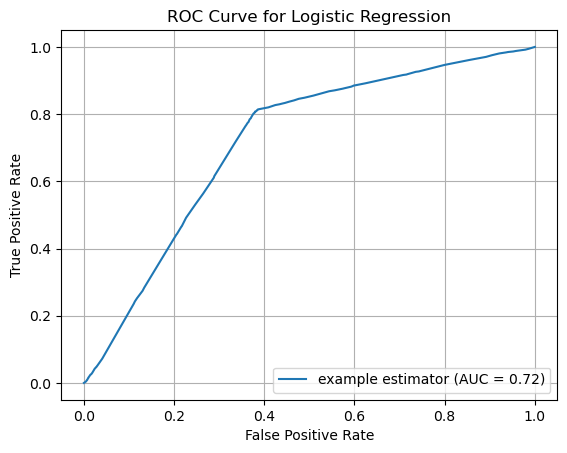

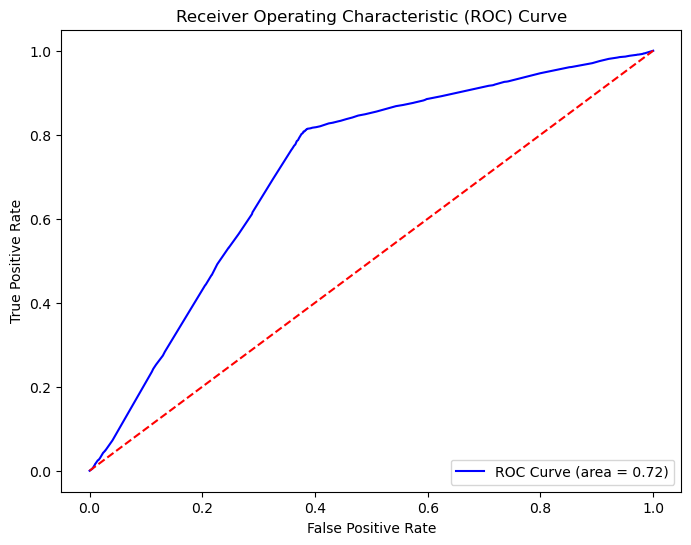

In [135]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.title("ROC Curve for Logistic Regression")
plt.grid()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Decision Tree Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.82      0.62      0.71     11755
           1       0.60      0.80      0.69      8245

    accuracy                           0.70     20000
   macro avg       0.71      0.71      0.70     20000
weighted avg       0.73      0.70      0.70     20000



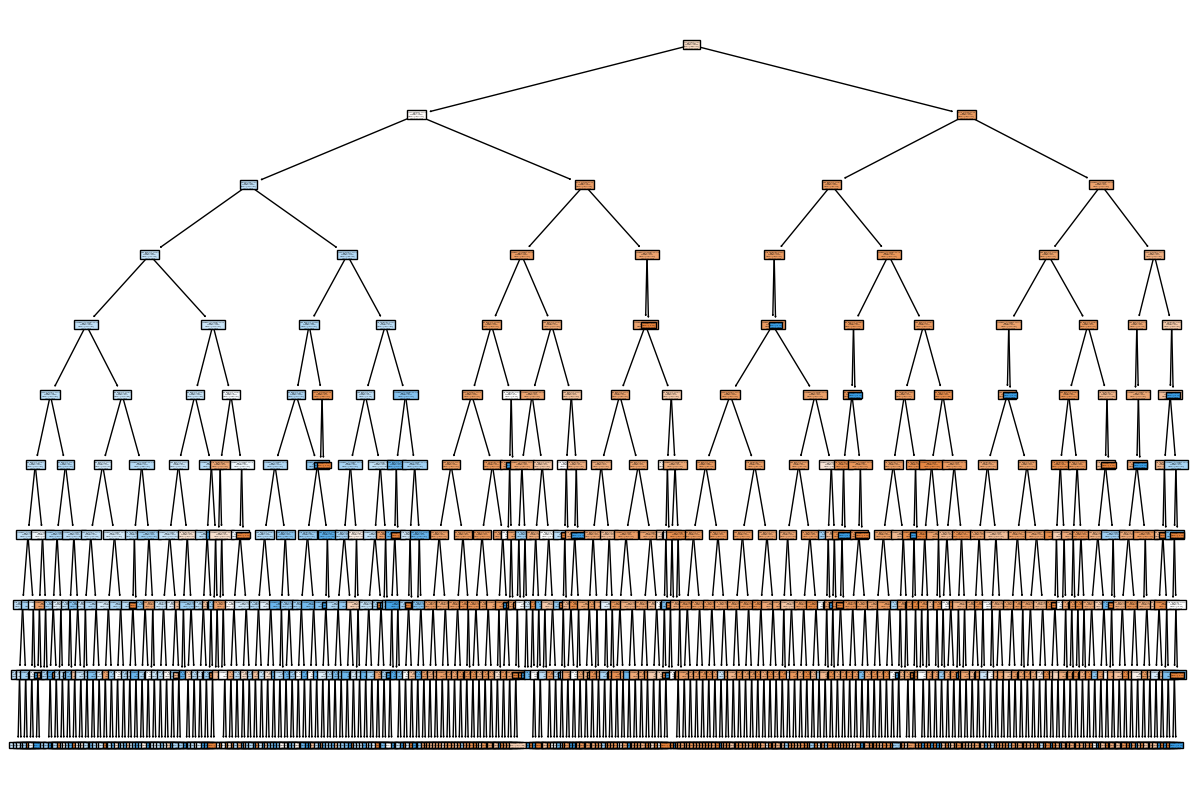

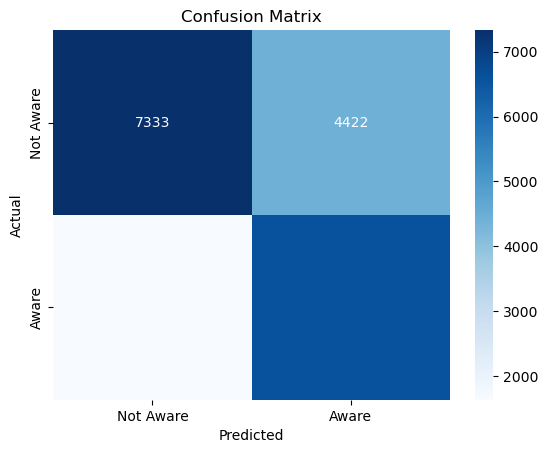

array([[7333, 4422],
       [1631, 6614]])

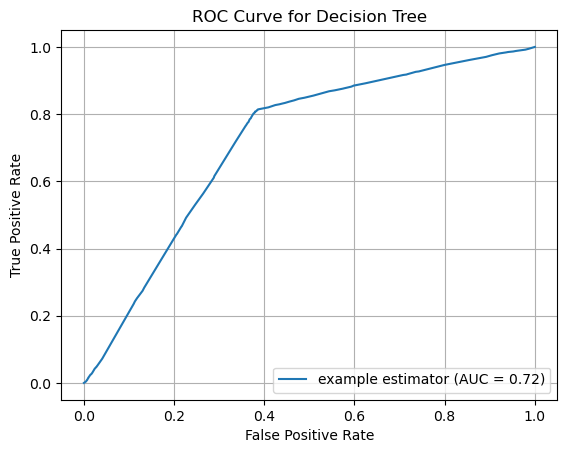

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize and fit the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=10,random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')

# Confusion Matrix and ROC AUC
confusion = confusion_matrix(y_test, y_pred_tree)
print(classification_report(y_test, y_pred_tree))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Not Aware', 'Aware'], proportion=True)
plt.show()

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Aware', 'Aware'], yticklabels=['Not Aware', 'Aware'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

y_pred_proba = tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.title("ROC Curve for Decision Tree")
plt.grid()
confusion


In [137]:
import xgboost as xgb
X2 = carmax[['finance_customer','service_plan_customer','num_web_visits','unaided_awareness','total_touchpoints','campaign_b_touchpoints']]
y2 = carmax['purchase_flag']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y)

count_class_0, count_class_1 = carmax['purchase_flag'].value_counts()
scale_pos_weight = count_class_0 / count_class_1

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 30,  # Maximum depth of a tree
    'eta': 0.8,  # Learning rate
    'objective': 'binary:logistic',  # Specify binary classification
    'scale_pos_weight': scale_pos_weight  # Add scale_pos_weight
}

# Train the model
num_round = 100  # Number of training rounds
model = xgb.train(param, dtrain, num_round)

# Predict the classes
preds = model.predict(dtest)

from sklearn.metrics import accuracy_score, f1_score, precision_score

preds_class = [1 if pred > 0.1 else 0 for pred in preds]

accuracy = accuracy_score(y_test, preds_class)
f1_score = f1_score(y_test, preds_class)
precision = precision_score(y_test, preds_class)


accuracy, f1_score, precision

(0.75955, 0.702762840719451, 0.5596023230632936)

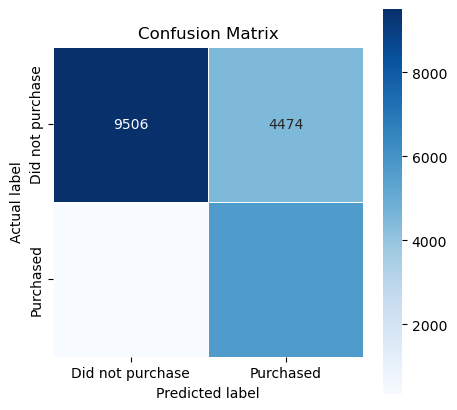

array([[9506, 4474],
       [ 335, 5685]])

In [138]:
# Plot confusion matrix
cm = confusion_matrix(y_test, preds_class)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True,cmap='Blues',xticklabels=['Did not purchase', 'Purchased'], yticklabels=['Did not purchase', 'Purchased'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()
cm

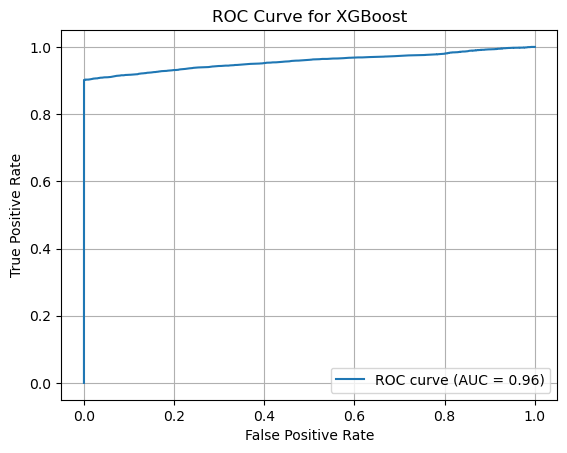

In [139]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='ROC curve')
display.plot()
plt.title("ROC Curve for XGBoost")
plt.grid()

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
carmax['unaided_awareness'] = carmax['unaided_awareness'].apply(lambda x: 1 if x > 0.18 else 0)  # Set your threshold
X = carmax[['campaign_b_touchpoints',
       'campaign_c_touchpoints', 'total_touchpoints', 'num_web_visits',
       'finance_customer', 'trade_in_customer',
       'region_Midwest', 'region_Northeast', 'purchase_flag']]
y = carmax['unaided_awareness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import lightgbm as lgb

# Initialize and fit the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f'LightGBM Accuracy: {accuracy_lgb:.2f}')

# Confusion Matrix and ROC AUC
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
print(f'LightGBM ROC AUC Score: {roc_auc_lgb:.2f}')


[LightGBM] [Info] Number of positive: 33017, number of negative: 46983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412712 -> initscore=-0.352763
[LightGBM] [Info] Start training from score -0.352763
LightGBM Accuracy: 0.70
LightGBM ROC AUC Score: 0.73


KNN Accuracy: 0.67
KNN ROC AUC Score: 0.71


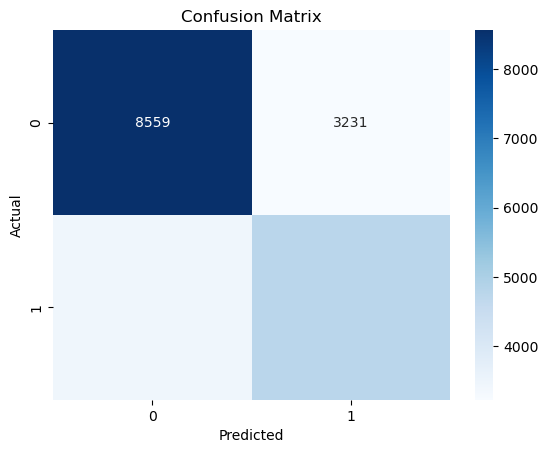

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     11790
           1       0.60      0.58      0.59      8210

    accuracy                           0.67     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.67      0.67      0.67     20000



array([[8559, 3231],
       [3442, 4768]])

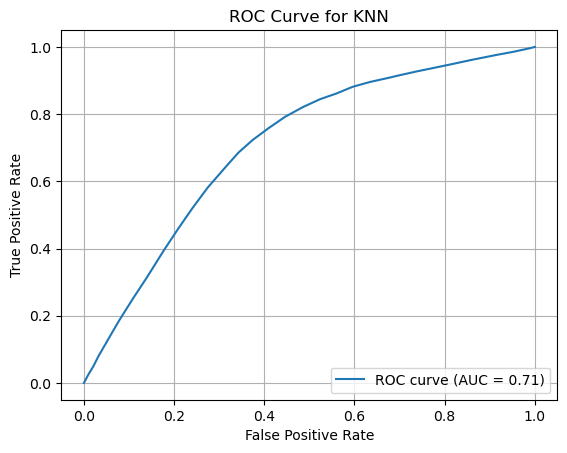

In [141]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

# Confusion Matrix and ROC AUC
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f'KNN ROC AUC Score: {roc_auc_knn:.2f}')

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_knn))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_knn)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='ROC curve')
display.plot()
plt.title("ROC Curve for KNN")
plt.grid()
confusion

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')

# Confusion Matrix and ROC AUC
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f'Gradient Boosting ROC AUC Score: {roc_auc_gb:.2f}')


Gradient Boosting Accuracy: 0.70
Gradient Boosting ROC AUC Score: 0.73


In [143]:
carmax

,campaign_a_touchpoints,campaign_b_touchpoints,campaign_c_touchpoints,total_touchpoints,num_web_visits,finance_customer,service_plan_customer,trade_in_customer,region_Midwest,region_Northeast,...,vehicle_class_MEDIUM SUV,vehicle_class_MID SIZE,vehicle_class_PICKUP,vehicle_class_SMALL SUV,vehicle_class_SPORTS CAR,vehicle_class_VAN,purchase_flag,unaided_awareness,region,vehicle_class
0,10,0,0,10,27,0,0,1,0,0,...,0,0,0,0,0,0,0,0,South,NaN
1,0,1,0,1,92,0,0,0,0,0,...,0,0,0,0,0,0,0,1,South,NaN
2,0,5,0,5,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,South,NaN
3,0,5,0,5,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,South,NaN
4,0,0,0,0,13,0,1,0,0,0,...,1,0,0,0,0,0,1,1,South,MEDIUM SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,2,0,2,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Midwest,NaN
99996,0,0,0,0,10,0,1,0,1,0,...,0,0,1,0,0,0,1,0,Midwest,PICKUP
99997,0,2,0,2,9,1,1,1,0,1,...,0,0,1,0,0,0,1,1,Northeast,PICKUP
99998,0,0,0,0,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Midwest,NaN


                          campaign_a_touchpoints  campaign_b_touchpoints  \
campaign_a_touchpoints                  1.000000                0.004014   
campaign_b_touchpoints                  0.004014                1.000000   
campaign_c_touchpoints                  0.001572               -0.000978   
total_touchpoints                       0.352645                0.920369   
num_web_visits                          0.044484                0.099118   
finance_customer                        0.015556                0.055554   
service_plan_customer                   0.016936                0.042490   
trade_in_customer                      -0.001653               -0.002735   
region_Midwest                         -0.017191                0.040056   
region_Northeast                       -0.009370               -0.042722   
region_South                           -0.002528                0.009893   
region_West                             0.029880               -0.011935   
vehicle_clas

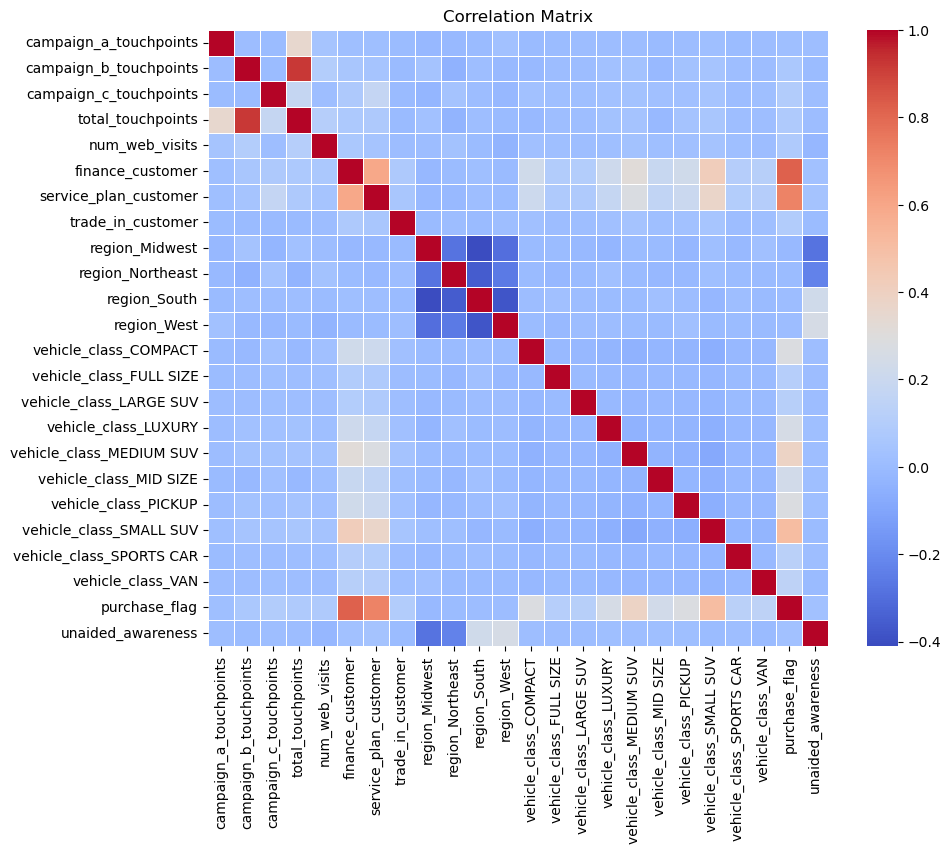

In [144]:
carmax=carmax.drop(['region','vehicle_class'],axis=1)
correlation_matrix = carmax.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [145]:
carmax.describe()

,campaign_a_touchpoints,campaign_b_touchpoints,campaign_c_touchpoints,total_touchpoints,num_web_visits,finance_customer,service_plan_customer,trade_in_customer,region_Midwest,region_Northeast,...,vehicle_class_LARGE SUV,vehicle_class_LUXURY,vehicle_class_MEDIUM SUV,vehicle_class_MID SIZE,vehicle_class_PICKUP,vehicle_class_SMALL SUV,vehicle_class_SPORTS CAR,vehicle_class_VAN,purchase_flag,unaided_awareness
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,0.185650,1.644060,0.179440,2.009150,25.875940,0.223570,0.182670,0.212880,0.244400,0.196870,...,0.005990,0.027090,0.060230,0.022010,0.032210,0.099030,0.00712,0.008890,0.300030,0.412270
std,1.642355,4.329376,0.831365,4.710237,24.373602,0.416639,0.386398,0.409346,0.429733,0.397635,...,0.077163,0.162347,0.237914,0.146717,0.176558,0.298704,0.08408,0.093867,0.458273,0.492246
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,95.000000,98.000000,21.000000,98.000000,183.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
